In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(4812)

In [28]:
np.logspace(-3, -0.6989700043360187, 10, base=10)

array([0.001     , 0.00180165, 0.00324594, 0.00584804, 0.0105361 ,
       0.01898235, 0.03419952, 0.0616155 , 0.11100946, 0.2       ])

In [21]:
np.log10(0.2)

-0.6989700043360187

In [20]:
plosses = np.linspace(0.0, 0.3, 5)                           # 線形で値を決めるとき
plosses = np.append( plosses, np.linspace(0.35, 0.5, 7))
plosses

array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  ])

In [67]:
from func import multi_graph_generator, planer_code_x_stabilisers, num_decoding_failures

In [68]:
L=5
Hx =  planer_code_x_stabilisers(L)
graph_matching =  multi_graph_generator(Hx, L)

graph_matching.nodes.data()

NodeDataView({0: {'is_boundary': False, 'pos': (0, 0)}, 20: {'is_boundary': True, 'pos': (2.0, -2)}, 1: {'is_boundary': False, 'pos': (1, 0)}, 2: {'is_boundary': False, 'pos': (2, 0)}, 3: {'is_boundary': False, 'pos': (3, 0)}, 4: {'is_boundary': False, 'pos': (4, 0)}, 5: {'is_boundary': False, 'pos': (0, 1)}, 6: {'is_boundary': False, 'pos': (1, 1)}, 7: {'is_boundary': False, 'pos': (2, 1)}, 8: {'is_boundary': False, 'pos': (3, 1)}, 9: {'is_boundary': False, 'pos': (4, 1)}, 10: {'is_boundary': False, 'pos': (0, 2)}, 11: {'is_boundary': False, 'pos': (1, 2)}, 12: {'is_boundary': False, 'pos': (2, 2)}, 13: {'is_boundary': False, 'pos': (3, 2)}, 14: {'is_boundary': False, 'pos': (4, 2)}, 15: {'is_boundary': False, 'pos': (0, 3)}, 16: {'is_boundary': False, 'pos': (1, 3)}, 17: {'is_boundary': False, 'pos': (2, 3)}, 18: {'is_boundary': False, 'pos': (3, 3)}, 19: {'is_boundary': False, 'pos': (4, 3)}})

In [69]:
graph_matching.edges(keys=True).data()

MultiEdgeDataView([(0, 20, {'fault_ids': {0}, 'weight': 1.0, 'error_probability': -1.0}), (0, 5, {'fault_ids': {5}, 'weight': 1.0, 'error_probability': -1.0}), (0, 1, {'fault_ids': {25}, 'weight': 1.0, 'error_probability': -1.0}), (20, 1, {'fault_ids': {1}, 'weight': 1.0, 'error_probability': -1.0}), (20, 2, {'fault_ids': {2}, 'weight': 1.0, 'error_probability': -1.0}), (20, 3, {'fault_ids': {3}, 'weight': 1.0, 'error_probability': -1.0}), (20, 4, {'fault_ids': {4}, 'weight': 1.0, 'error_probability': -1.0}), (20, 15, {'fault_ids': {20}, 'weight': 1.0, 'error_probability': -1.0}), (20, 16, {'fault_ids': {21}, 'weight': 1.0, 'error_probability': -1.0}), (20, 17, {'fault_ids': {22}, 'weight': 1.0, 'error_probability': -1.0}), (20, 18, {'fault_ids': {23}, 'weight': 1.0, 'error_probability': -1.0}), (20, 19, {'fault_ids': {24}, 'weight': 1.0, 'error_probability': -1.0}), (1, 6, {'fault_ids': {6}, 'weight': 1.0, 'error_probability': -1.0}), (1, 2, {'fault_ids': {26}, 'weight': 1.0, 'error_p

In [70]:
graph_matching.edges()

MultiEdgeDataView([(0, 20), (0, 5), (0, 1), (20, 1), (20, 2), (20, 3), (20, 4), (20, 15), (20, 16), (20, 17), (20, 18), (20, 19), (1, 6), (1, 2), (2, 7), (2, 3), (3, 8), (3, 4), (4, 9), (5, 10), (5, 6), (6, 11), (6, 7), (7, 12), (7, 8), (8, 13), (8, 9), (9, 14), (10, 15), (10, 11), (11, 16), (11, 12), (12, 17), (12, 13), (13, 18), (13, 14), (14, 19), (15, 16), (16, 17), (17, 18), (18, 19)])

(-0.42000000000000004, 4.42, -2.525, 3.525)

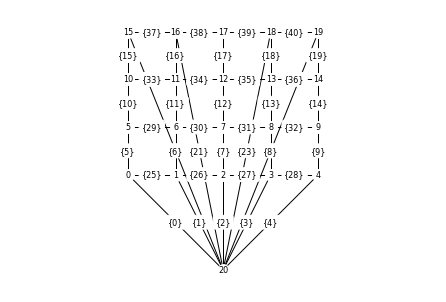

In [71]:
ngrid = L
g = graph_matching
node_pos={n: g.nodes[n]['pos'] for n in g.nodes()}

nx.draw(g,
        pos=node_pos, 
        node_color='white', 
        # edge_color='black',
        node_size=700/ngrid, 
        font_size=40/ngrid,
        labels = {n: n for n in g.nodes()},
        # with_label = True,
        )
nx.draw_networkx_edge_labels(g, node_pos, 
                {e[:2]: g.edges[e]['fault_ids'] for e in g.edges(keys=True)}, 
                font_size=8, 
                rotate=False, 
                clip_on=True,
                )
plt.axis('equal')

In [72]:
import random

#属性を検索する関数
def find_specific_attribute_edge(G, attr, value):
    result = []
    d = nx.get_edge_attributes(G, attr)
    for key, v in d.items():
        if(v == {value}):
            result.append(key)
    return result

def find_specific_node_id(G, attr, id):
    result=None
    d = nx.get_node_attributes(G, attr)
    for key, v in d.items():
        if(id in v):
            result=key
        else:
            pass
    return result


def erasure_error(g_matching, error_prob={"erasure":0.0}):

        # エラーが起きるedgeの乱択
        # 二項分布からエラーが起こるedgeの個数を選択
        num_eerrer = np.random.binomial(g_matching.number_of_edges(), error_prob["erasure"], 1)

        # エラーの起きるedgeの選択
        erasure_errors = random.sample([i for i in range(g_matching.number_of_edges())], k=num_eerrer[0])

        # edegeにエラー属性を付加
        for e in g_matching.edges():
            g_matching.edges[e]['erasure'] = False
        erasure_edges = []
        for id in erasure_errors:
            temp=find_specific_attribute_edge(g_matching, "fault_ids", id)
            erasure_edges.extend(temp)
        for e in erasure_edges:
            
            pass     
            
        return g_matching

graph_matching

In [89]:
error_prob={"erasure":0.15}
g_matching = graph_matching.copy()
num_eerrer = np.random.binomial(g_matching.number_of_edges(), error_prob["erasure"], 1)

# エラーの起きるedgeの選択
erasure_errors = random.sample([i for i in range(g_matching.number_of_edges())], k=num_eerrer[0])
print(erasure_errors)


# edegeにエラー属性を付加
for e in g_matching.edges(keys=True):
    g_matching.edges[e]['erasure'] = False
for n in g_matching.nodes():
    g_matching.nodes[n]['node_ids'] = [n]

erasure_edges = []
for id in erasure_errors:
    temp=find_specific_attribute_edge(g_matching, "fault_ids", id)
    erasure_edges.extend(temp)

# g_matching.edges.data()

print(erasure_edges)
# 消失したedgeに関するnodeを統合
for e0 in erasure_edges:
    node_id0=find_specific_node_id(g_matching, 'node_ids', e0[0])
    node_id1=find_specific_node_id(g_matching, 'node_ids', e0[1])
    print("node_id",node_id0, node_id1)
    if node_id0 !=node_id1:
        new_node_ids = g_matching.nodes[node_id0]['node_ids']
        new_node_ids.extend(g_matching.nodes[node_id1]['node_ids'])
        g_matching.nodes[node_id0]['node_ids'] = new_node_ids

        new_pos = ((g_matching.nodes[node_id0]['pos'][0]+g_matching.nodes[node_id1]['pos'][0])/2, (g_matching.nodes[node_id0]['pos'][1]+g_matching.nodes[node_id1]['pos'][1])/2)
        g_matching.nodes[node_id0]['pos'] = new_pos

        for e1 in g_matching.edges(node_id1, keys=True):
            print("e1",e1)
            if node_id0!=e1[1]:
                g_matching.add_edge(node_id0, e1[1], **g_matching.edges[e1])
        g_matching.remove_node(node_id1)
    
 

[9, 26, 37, 32, 7]
[(4, 9, 0), (1, 2, 0), (15, 16, 0), (8, 9, 0), (2, 7, 0)]
node_id 4 9
(9, 4, 0)
(9, 8, 0)
(9, 14, 0)
node_id 1 2
(2, 20, 0)
(2, 1, 0)
(2, 7, 0)
(2, 3, 0)
node_id 15 16
(16, 20, 0)
(16, 11, 0)
(16, 15, 0)
(16, 17, 0)
node_id 8 4
(4, 20, 0)
(4, 3, 0)
(4, 8, 0)
(4, 14, 0)
node_id 1 7
(7, 6, 0)
(7, 12, 0)
(7, 8, 0)
(7, 1, 0)


In [90]:
g_matching.nodes.data('node_ids')

NodeDataView({0: [0], 20: [20], 1: [1, 2, 7], 3: [3], 5: [5], 6: [6], 8: [8, 4, 9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15, 16], 17: [17], 18: [18], 19: [19]}, data='node_ids')

In [91]:
g_matching.edges(12)

MultiEdgeDataView([(12, 11), (12, 17), (12, 13), (12, 1)])

In [92]:
g_matching.nodes.data("pos")

NodeDataView({0: (0, 0), 20: (2.0, -2), 1: (1.75, 0.5), 3: (3, 0), 5: (0, 1), 6: (1, 1), 8: (3.5, 0.75), 10: (0, 2), 11: (1, 2), 12: (2, 2), 13: (3, 2), 14: (4, 2), 15: (0.5, 3.0), 17: (2, 3), 18: (3, 3), 19: (4, 3)}, data='pos')

In [93]:
g_matching.nodes[5]

{'is_boundary': False, 'pos': (0, 1), 'node_ids': [5]}

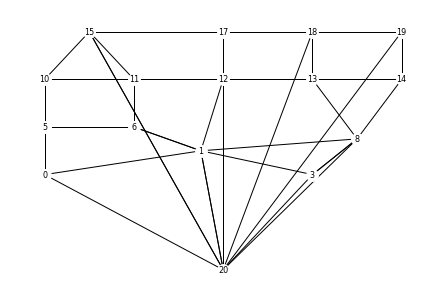

In [94]:
ngrid = L
node_pos={n: g_matching.nodes[n]['pos'] for n in g_matching.nodes()}

nx.draw(g_matching,
        pos=node_pos, 
        node_color='white', 
        # edge_color='black',
        node_size=700/ngrid, 
        font_size=40/ngrid,
        labels = {n: n for n in g_matching.nodes()},
        # with_label = True,
        )
# nx.draw_networkx_edge_labels(g_matching, node_pos, 
#                 {e[:2]: g_matching.edges[e]['fault_ids'] for e in g_matching.edges(keys=True)}, 
#                 font_size=8, 
#                 rotate=False, 
#                 clip_on=True,
#                 )

In [99]:
# edgeの本数のカウント
import collections

multi_loss_edges = {}
for n in g_matching.nodes():
    for m in range(n+1, L**2-L+1):
        l = g_matching.number_of_edges(n, m)
        if l >1:
            for node0 in g_matching.nodes[n]['node_ids']:
                for node1 in g_matching.nodes[m]['node_ids']:
                    if node0<node1:
                        multi_loss_edges[(node0, node1)]=l
                    else:
                        pass

multi_loss_edges
            

{(1, 6): 2,
 (2, 6): 2,
 (1, 20): 2,
 (2, 20): 2,
 (7, 20): 2,
 (3, 8): 2,
 (3, 4): 2,
 (3, 9): 2,
 (15, 20): 2,
 (16, 20): 2}

In [98]:
for n in g_matching.nodes():
    print(g_matching.nodes[n]['node_ids'])

[0]
[20]
[1, 2, 7]
[3]
[5]
[6]
[8, 4, 9]
[10]
[11]
[12]
[13]
[14]
[15, 16]
[17]
[18]
[19]


# 2022/5/9 開発再開
多分matchingグラフをマルチグラフにしてloss edgeの個数をカウントするところを作ってた途中のはず

上のプログラムで、複数edgeのロス $n_l$のカウントができている。

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(4812)

from func import multi_graph_generator, planer_code_x_stabilisers, num_decoding_failures, Erasured_matching_graph_creater, add_degrade_attribute, get_edge_number, weight_generator

In [2]:
L=5
Hx =  planer_code_x_stabilisers(L)
graph_matching =  multi_graph_generator(Hx, L)

erasure errors: [ 6 12 16 23 24 25 34 37 39 40]


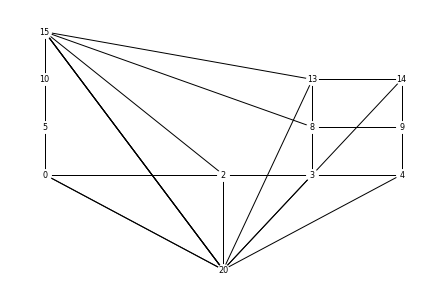

In [4]:
graph_degraded_matching =  Erasured_matching_graph_creater(graph_matching, L,lossqubits)



# 描画
ngrid = L
node_pos={n: graph_matching.nodes[n]['pos'] for n in graph_degraded_matching.nodes()}

nx.draw(graph_degraded_matching,
        pos=node_pos, 
        node_color='white', 
        # edge_color='black',
        node_size=700/ngrid, 
        font_size=40/ngrid,
        labels = {n: n for n in graph_degraded_matching.nodes()},
        # with_label = True,
        )

In [3]:
L=5
ploss = 0.25

num = np.array([i for i in range(L**2+(L-1)**2)])           # lossしたqubitを見つけるための数列
num_errors = 0                                              # エラーカウンターの設定
for i in range(1):
    flag_loss = np.random.binomial(1, ploss, L**2+(L-1)**2)
    lossqubits = num  * flag_loss
    lossqubits = lossqubits[lossqubits.nonzero()]
print(lossqubits)

[ 6 12 16 23 24 25 34 37 39 40]


In [5]:
dict_loss_degraded_edges = dict_number_of_degraded_edges(graph_matching, L, lossqubits)
degraded_edge_id_list = [graph_matching.edges[k[0],k[1],0]['fault_ids'] for k in dict_loss_degraded_edges.keys()]
dict_loss_degraded_edges 

NameError: name 'dict_number_of_degraded_edges' is not defined

In [6]:
print(degraded_edge_id_list)

NameError: name 'degraded_edge_id_list' is not defined

これで、被りのあるedge idの取得ができた。
次は、edgeのweightを決めるのをする。

In [5]:
graph_matching = add_degrade_attribute(graph_matching, graph_degraded_matching, L, lossqubits)

erasure errors: [ 6 12 16 23 24 25 34 37 39 40]


In [6]:
graph_matching.edges(data=True)

MultiEdgeDataView([(0, 20, {'fault_ids': {0}, 'weight': 1.0, 'error_probability': -1.0, 'n': 2}), (0, 5, {'fault_ids': {5}, 'weight': 1.0, 'error_probability': -1.0, 'n': 2}), (0, 1, {'fault_ids': {25}, 'weight': 1.0, 'error_probability': -1.0, 'n': 0}), (20, 1, {'fault_ids': {1}, 'weight': 1.0, 'error_probability': -1.0, 'n': 1}), (20, 2, {'fault_ids': {2}, 'weight': 1.0, 'error_probability': -1.0, 'n': 1}), (20, 3, {'fault_ids': {3}, 'weight': 1.0, 'error_probability': -1.0, 'n': 1}), (20, 4, {'fault_ids': {4}, 'weight': 1.0, 'error_probability': -1.0, 'n': 1}), (20, 15, {'fault_ids': {20}, 'weight': 1.0, 'error_probability': -1.0, 'n': 4}), (20, 16, {'fault_ids': {21}, 'weight': 1.0, 'error_probability': -1.0, 'n': 1}), (20, 17, {'fault_ids': {22}, 'weight': 1.0, 'error_probability': -1.0, 'n': 1}), (20, 18, {'fault_ids': {23}, 'weight': 1.0, 'error_probability': -1.0, 'n': 0}), (20, 19, {'fault_ids': {24}, 'weight': 1.0, 'error_probability': -1.0, 'n': 0}), (1, 6, {'fault_ids': {6}

In [7]:
from func import find_specific_attribute_edge
find_specific_attribute_edge(graph_matching, 'n', 0)

[(0, 1, 0),
 (20, 18, 0),
 (20, 19, 0),
 (1, 6, 0),
 (7, 12, 0),
 (11, 16, 0),
 (11, 12, 0),
 (15, 16, 0),
 (17, 18, 0),
 (18, 19, 0)]

In [8]:
lossedges = []
for i in lossqubits:
    temp = find_specific_attribute_edge(graph_matching, 'fault_ids', {i})
    lossedges.extend(temp)
lossedges

[(1, 6, 0),
 (7, 12, 0),
 (11, 16, 0),
 (20, 18, 0),
 (20, 19, 0),
 (0, 1, 0),
 (11, 12, 0),
 (15, 16, 0),
 (17, 18, 0),
 (18, 19, 0)]

In [9]:
get_edge_number(Erasured_matching_graph_creater(graph_degraded_matching, L,lossqubits), L)

erasure errors: [ 6 12 16 23 24 25 34 37 39 40]


{(0, 20, 0): 2,
 (0, 5, 0): 2,
 (0, 15, 0): 2,
 (20, 0, 0): 2,
 (20, 15, 0): 4,
 (5, 0, 0): 2,
 (10, 15, 0): 2,
 (15, 0, 0): 2,
 (15, 20, 0): 4,
 (15, 10, 0): 2}

In [10]:
from func import find_specific_attribute_edge
find_specific_attribute_edge(graph_matching, 'n', 2)

[(0, 20, 0), (0, 5, 0), (10, 15, 0)]

In [11]:
from func import find_specific_attribute_edge
find_specific_attribute_edge(graph_matching, 'n', 3)

[]

In [12]:
from func import find_specific_attribute_edge
find_specific_attribute_edge(graph_matching, 'n', 4)

[(20, 15, 0)]

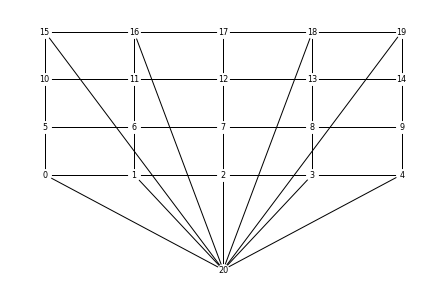

In [13]:
ngrid = L
node_pos={n: graph_matching.nodes[n]['pos'] for n in graph_matching.nodes()}

nx.draw(graph_matching,
        pos=node_pos, 
        node_color='white', 
        # edge_color='black',
        node_size=700/ngrid, 
        font_size=40/ngrid,
        labels = {n: n for n in graph_matching.nodes()},
        # with_label = True,
        )

In [14]:
graph_matching.edges(keys=True)

MultiEdgeView([(0, 20, 0), (0, 5, 0), (0, 1, 0), (20, 1, 0), (20, 2, 0), (20, 3, 0), (20, 4, 0), (20, 15, 0), (20, 16, 0), (20, 17, 0), (20, 18, 0), (20, 19, 0), (1, 6, 0), (1, 2, 0), (2, 7, 0), (2, 3, 0), (3, 8, 0), (3, 4, 0), (4, 9, 0), (5, 10, 0), (5, 6, 0), (6, 11, 0), (6, 7, 0), (7, 12, 0), (7, 8, 0), (8, 13, 0), (8, 9, 0), (9, 14, 0), (10, 15, 0), (10, 11, 0), (11, 16, 0), (11, 12, 0), (12, 17, 0), (12, 13, 0), (13, 18, 0), (13, 14, 0), (14, 19, 0), (15, 16, 0), (16, 17, 0), (17, 18, 0), (18, 19, 0)])

In [15]:
graph_degraded_matching.nodes(data=True)

NodeDataView({0: {'is_boundary': False, 'pos': (0.5, 0.25), 'node_ids': [0, 1, 6]}, 20: {'is_boundary': True, 'pos': (2.625, 2.375), 'node_ids': [20, 18, 19, 17]}, 2: {'is_boundary': False, 'pos': (2, 0), 'node_ids': [2]}, 3: {'is_boundary': False, 'pos': (3, 0), 'node_ids': [3]}, 4: {'is_boundary': False, 'pos': (4, 0), 'node_ids': [4]}, 5: {'is_boundary': False, 'pos': (0, 1), 'node_ids': [5]}, 8: {'is_boundary': False, 'pos': (3, 1), 'node_ids': [8]}, 9: {'is_boundary': False, 'pos': (4, 1), 'node_ids': [9]}, 10: {'is_boundary': False, 'pos': (0, 2), 'node_ids': [10]}, 13: {'is_boundary': False, 'pos': (3, 2), 'node_ids': [13]}, 14: {'is_boundary': False, 'pos': (4, 2), 'node_ids': [14]}, 15: {'is_boundary': False, 'pos': (0.75, 2.5), 'node_ids': [15, 11, 16, 7, 12]}})

In [4]:
p = 0.01
spacelike_weight_generator(graph_matching, p, L, lossqubits=lossqubits)

erasure errors: [ 6 12 16 23 24 25 34 37 39 40]
erasure errors: [ 6 12 16 23 24 25 34 37 39 40]


[3.9020746947749556,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 3.9020746947749556,
 690.7755278982138,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 690.7755278982138,
 4.59511985013459,
 4.59511985013459,
 3.9020746947749556,
 690.7755278982138,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 3.20933546934136,
 4.59511985013459,
 4.59511985013459,
 690.7755278982138,
 690.7755278982138,
 690.7755278982138,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 4.59511985013459,
 690.7755278982138,
 4.59511985013459,
 4.59511985013459,
 690.7755278982138,
 4.59511985013459,
 690.7755278982138,
 690.7755278982138]